In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np



In [3]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text='ABCDE',org=(50,300), fontFace=font, fontScale=5, color=(255,255,255),thickness=25)
    return blank_img

In [57]:
def show_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

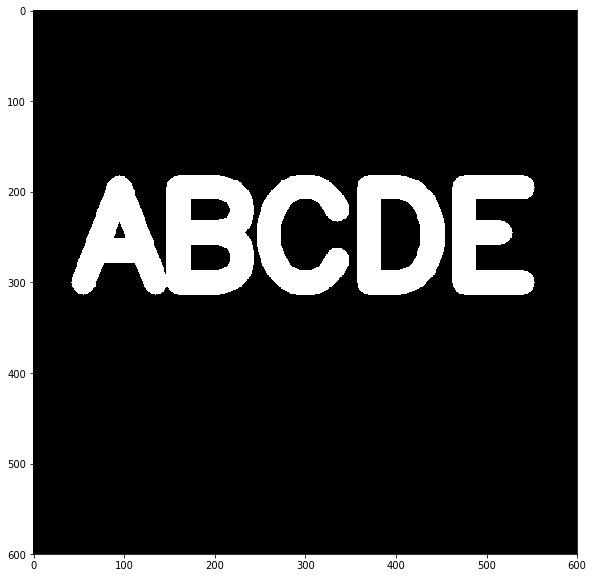

In [58]:
img = load_img()
show_img(img)

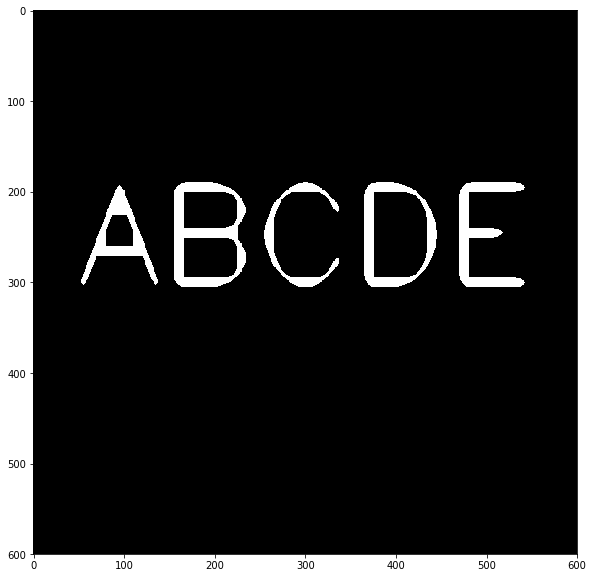

In [6]:
kernel = np.ones((5,5),dtype=np.uint8)
res = cv2.erode(img, kernel, iterations=4)
show_img(res)

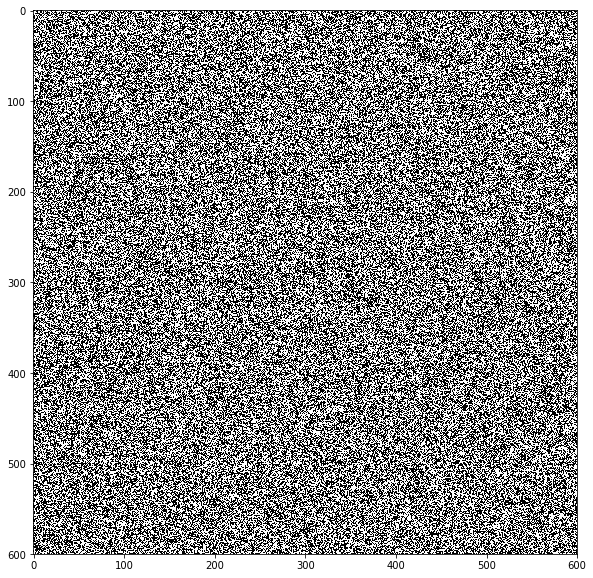

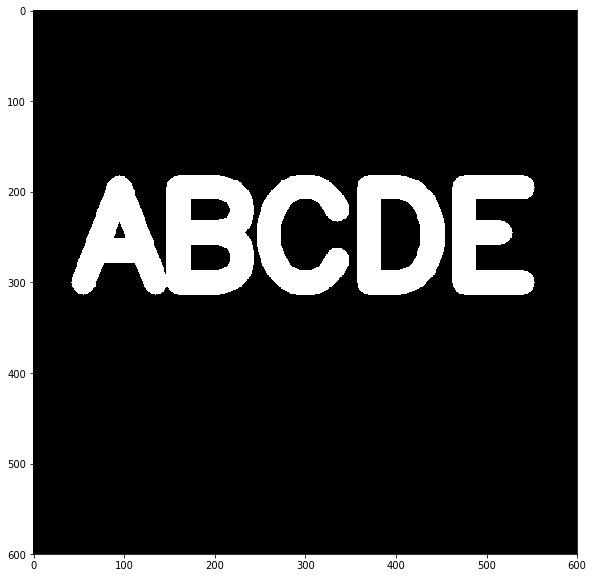

In [25]:
img = load_img()
white_noise = np.random.randint(low=0, high=2, size=(600,600))
white_noise
show_img(white_noise)
show_img(img)

In [9]:
img.max()

255.0

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


array([[  0,   0, 255, ...,   0, 255, 255],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ..., 255,   0, 255],
       ...,
       [  0, 255, 255, ..., 255, 255,   0],
       [255, 255,   0, ...,   0,   0,   0],
       [255, 255,   0, ...,   0, 255,   0]])

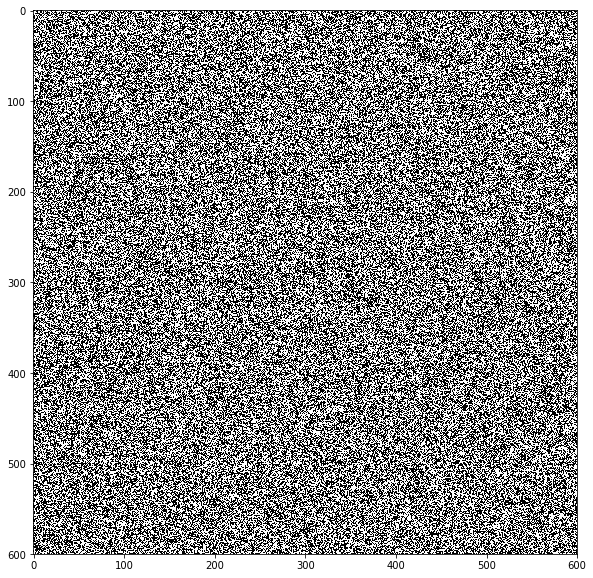

In [26]:
white_noise = white_noise * 255
show_img(white_noise)
white_noise

In [27]:
noise_img = white_noise + img

[[  0.   0. 255. ...   0. 255. 255.]
 [255. 255. 255. ...   0.   0.   0.]
 [255. 255. 255. ... 255.   0. 255.]
 ...
 [  0. 255. 255. ... 255. 255.   0.]
 [255. 255.   0. ...   0.   0.   0.]
 [255. 255.   0. ...   0. 255.   0.]]


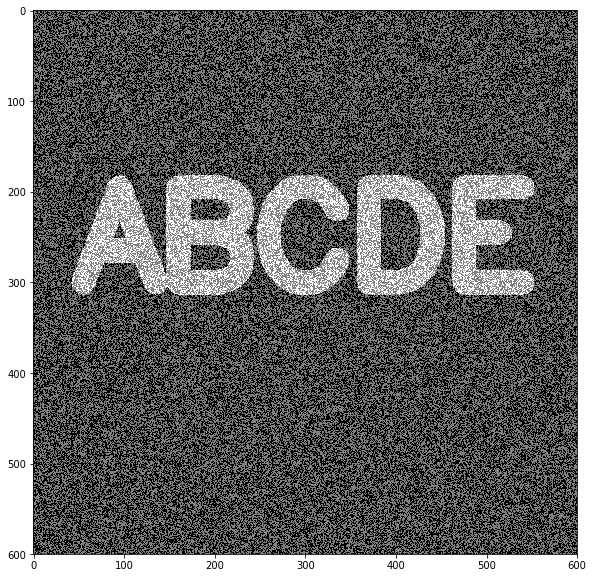

In [29]:
print(noise_img)
show_img(noise_img)

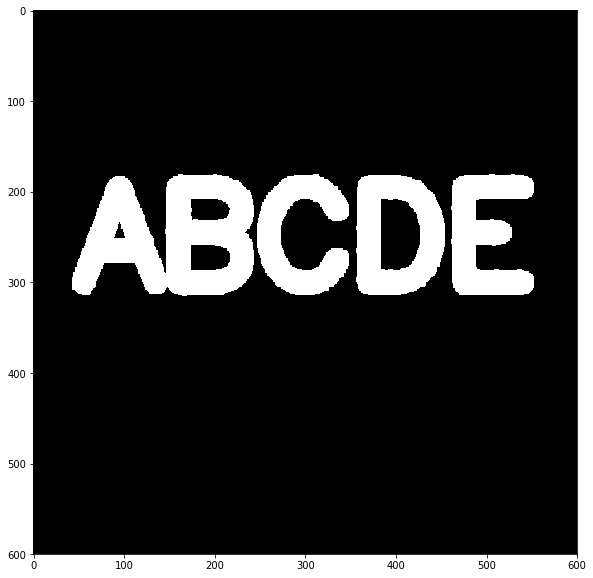

In [31]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN,kernel )
show_img(opening)

[[   0    0    0 ...    0    0    0]
 [   0 -255 -255 ...    0    0 -255]
 [-255 -255    0 ...    0 -255    0]
 ...
 [-255    0    0 ... -255 -255 -255]
 [-255    0    0 ... -255    0 -255]
 [   0 -255 -255 ... -255 -255 -255]]


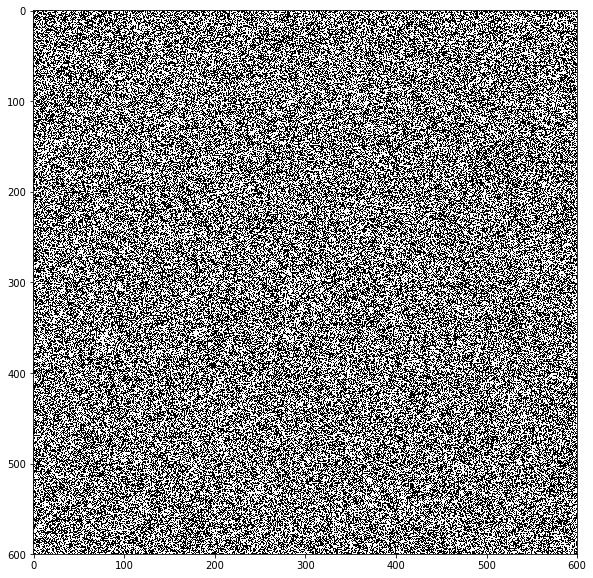

In [54]:
img = load_img()
black_noise = np.random.randint(low=0, high=2, size=(600,600))
black_noise = black_noise * -255

show_img(black_noise)
print(black_noise)

In [44]:
black_noise_img = img + black_noise

In [45]:
black_noise_img

array([[-255., -255.,    0., ...,    0.,    0., -255.],
       [-255., -255., -255., ..., -255., -255., -255.],
       [-255., -255.,    0., ...,    0., -255., -255.],
       ...,
       [-255.,    0., -255., ..., -255., -255.,    0.],
       [-255., -255., -255., ...,    0.,    0., -255.],
       [-255., -255.,    0., ...,    0., -255.,    0.]])

In [46]:
black_noise_img[black_noise_img == -255] = 0

In [47]:
black_noise_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

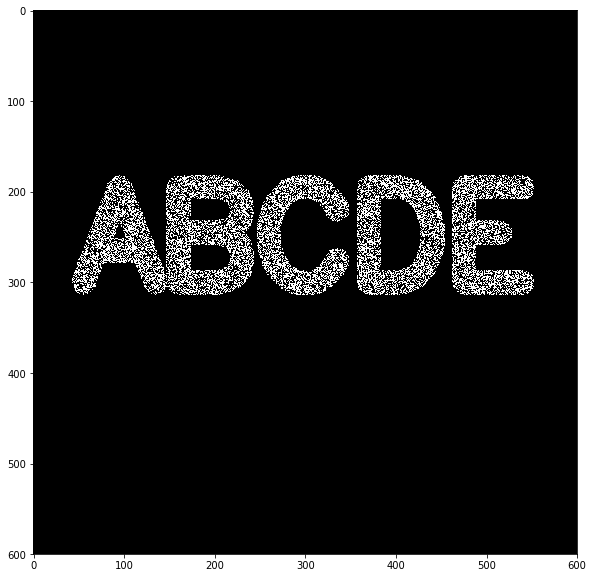

In [48]:
show_img(black_noise_img)

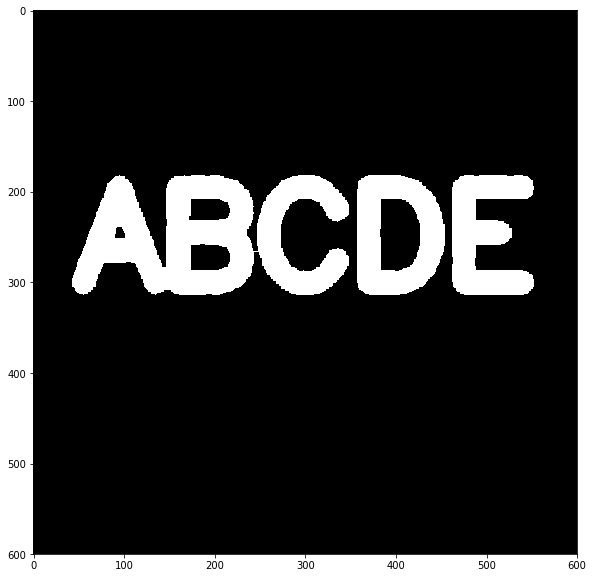

In [50]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
show_img(closing)

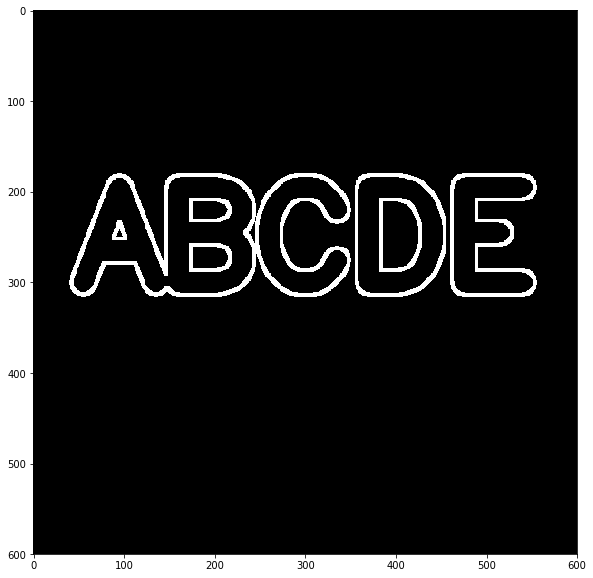

In [59]:
img = load_img()
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
show_img(gradient)